# **EDA on Crimes against Women**

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings('ignore')

## Data and Metadata

In [130]:
df=pd.read_csv("crimes_against_women_2001-2014.csv")
df.shape

(10677, 11)

In [131]:
df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


In [133]:
df.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [134]:
df.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [135]:
df.nunique()

Unnamed: 0                                             9017
STATE/UT                                                 72
DISTRICT                                               1605
Year                                                     14
Rape                                                    481
Kidnapping and Abduction                                555
Dowry Deaths                                            283
Assault on women with intent to outrage her modesty     649
Insult to modesty of Women                              381
Cruelty by Husband or his Relatives                     961
Importation of Girls                                     37
dtype: int64

In [136]:
df=df.drop("Unnamed: 0",axis=1)

In [137]:
list(df["STATE/UT"].unique())

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI',
 'LAKSHADWEEP',
 'PUDUCHERRY',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'A&N Islands',
 'Chandigarh',
 'D&N Haveli',
 'Daman & Diu',
 'Delhi UT',
 'Lakshadweep',
 '

## Data Cleaning

### Data Cleaning on STATE/UT Column

In [138]:
print(list(df["STATE/UT"].unique()))
print(len(list(df["STATE/UT"].unique())))

['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry', 'Telangana', 'A & N Islands']
72


In India we have only 36 States/UT but as per the data it has 72 States/UT. This is because some of the states/UT have been entered both in capital and small letters. Since the data is case sensitive, we get a total of 72 unique states/UT, while there are only 36. To clear this issue we converted all to a lower case. FUrthermore, all spacing issues were also resolved in order to bring down the number of unique states/UT to 36.

In [139]:
df.replace({'A&N Islands':'A & N Islands','D&N Haveli':'D & N HAVELI','Delhi UT':'DELHI'},inplace=True)

In [140]:
len(list(df["STATE/UT"].unique()))

69

In [141]:
df["STATE/UT"]=df["STATE/UT"].str.casefold()

In [142]:
len(list(df["STATE/UT"].unique()))

36

In [143]:
df["DISTRICT"].value_counts()

TOTAL         408
G.R.P.         49
SOUTH          41
NORTH          41
WEST           39
             ... 
Shopian         1
Sopore          1
Srinagar        1
Udhampur        1
Puducherry      1
Name: DISTRICT, Length: 1605, dtype: int64

### Data Cleaning on DISTRICT
  Initially we converted all the entries to lower case, and then obtained the unique list of District, while inspecting found that it has entries like "total", "zz total", "total district(s)", "delhi ut total" this doesn't look like an district name so while investigating it seems to be an total value of that state on each crime.
  If it present in the data it will mess up the data by increasing the No. of cases in each category so, found the indexes of that total and removed from the dataset

In [144]:
df["DISTRICT"]=df["DISTRICT"].str.lower()

In [145]:
df=df.drop(list(df[df["DISTRICT"]=="total"].index))

In [146]:
len(list(df[df["DISTRICT"]=="zz total"].index))

35

In [147]:
len(list(df[df["DISTRICT"]=="total district(s)"].index))

36

In [148]:
len(list(df[df["DISTRICT"]=="delhi ut total"].index))

12

In [149]:
df=df.drop(list(df[df["DISTRICT"]=="zz total"].index))

In [150]:
df=df.drop(list(df[df["DISTRICT"]=="total district(s)"].index))

In [151]:
df=df.drop(list(df[df["DISTRICT"]=="delhi ut total"].index))

In [152]:
df["DISTRICT"].value_counts()

g.r.p.            49
north             44
south             44
west              42
railways          38
                  ..
sabarkantha        1
surat city         1
vadodara city      1
ambala (rural)     1
vigilance          1
Name: DISTRICT, Length: 955, dtype: int64

In [153]:
df["DISTRICT"].unique()

array(['adilabad', 'anantapur', 'chittoor', 'cuddapah', 'east godavari',
       'guntakal rly.', 'guntur', 'hyderabad city', 'karimnagar',
       'khammam', 'krishna', 'kurnool', 'mahaboobnagar', 'medak',
       'nalgonda', 'nellore', 'nizamabad', 'prakasham', 'ranga reddy',
       'secunderabad rly.', 'srikakulam', 'vijayawada', 'vijayawada rly.',
       'visakha rural', 'visakhapatnam', 'vizianagaram', 'warangal',
       'west godavari', 'changlang', 'dibang valley', 'kameng east',
       'kameng west', 'lohit', 'papum pare', 'siang east', 'siang upper',
       'siang west', 'subansiri lower', 'subansiri upper', 'tawang',
       'tirap', 'barpeta', 'bongaigaon', 'c.i.d.', 'cachar', 'darrang',
       'dhemaji', 'dhubri', 'dibrugarh', 'g.r.p.', 'goalpara', 'golaghat',
       'guwahati city', 'hailakandi', 'jorhat', 'kamrup', 'karbi anglong',
       'karimganj', 'kokrajhar', 'lakhimpur', 'morigaon', 'n.c.hills',
       'nagaon', 'nalbari', 'r.p.o.', 'sibsagar', 'sonitpur', 'tinsukia',
 

In [154]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [155]:
df["Total"]=df["Rape"]+df["Kidnapping and Abduction"]+df["Dowry Deaths"]+df["Assault on women with intent to outrage her modesty"]+df["Insult to modesty of Women"]+df["Cruelty by Husband or his Relatives"]+df["Importation of Girls"]

In [159]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,andhra pradesh,adilabad,2001,50,30,16,149,34,175,0,454
1,andhra pradesh,anantapur,2001,23,30,7,118,24,154,0,356
2,andhra pradesh,chittoor,2001,27,34,14,112,83,186,0,456
3,andhra pradesh,cuddapah,2001,20,20,17,126,38,57,0,278
4,andhra pradesh,east godavari,2001,23,26,12,109,58,247,0,475


In [160]:
df.shape

(10186, 11)

## Yearly crime rate analysis

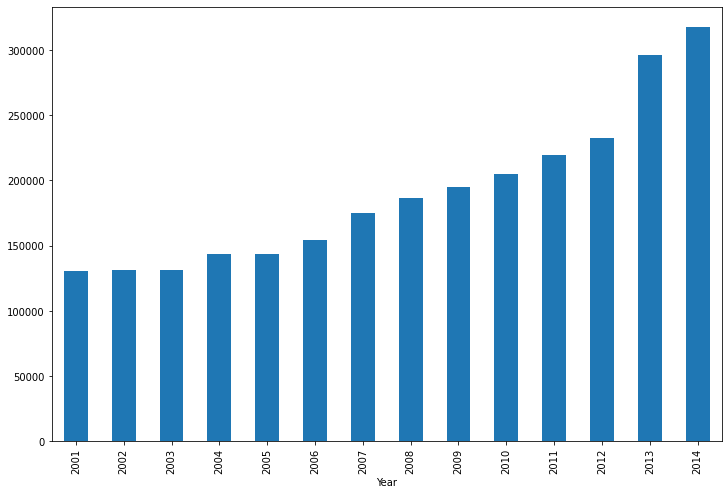

In [161]:
plt.figure(figsize=(12,8))
df.groupby("Year")["Total"].sum().plot.bar()

We can see that the crime rate has been steadily increasing as the years pass by. 

### Percentage Distribution of each Crime based on Year

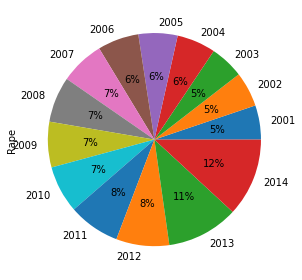

In [162]:
df.groupby("Year")["Rape"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

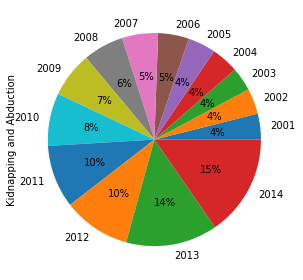

In [163]:
df.groupby("Year")["Kidnapping and Abduction"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

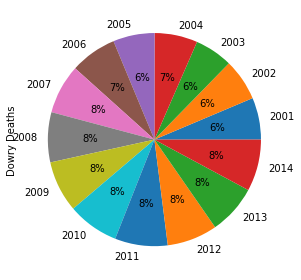

In [164]:
df.groupby("Year")["Dowry Deaths"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

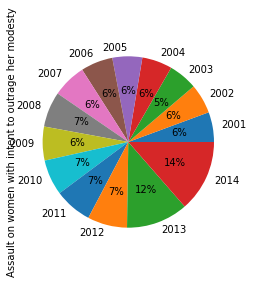

In [165]:
df.groupby("Year")["Assault on women with intent to outrage her modesty"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

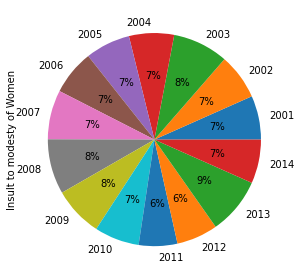

In [166]:
df.groupby("Year")["Insult to modesty of Women"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

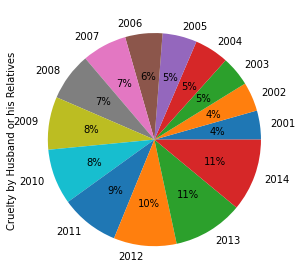

In [167]:
df.groupby("Year")["Cruelty by Husband or his Relatives"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

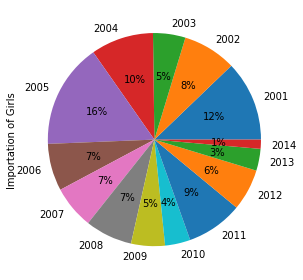

In [168]:
df.groupby("Year")["Importation of Girls"].sum().plot.pie(autopct='%1.0f%%')
plt.tight_layout()

### Summary
  All the crime types against women have been summarized as line graphs to visually show the trend as years go by.

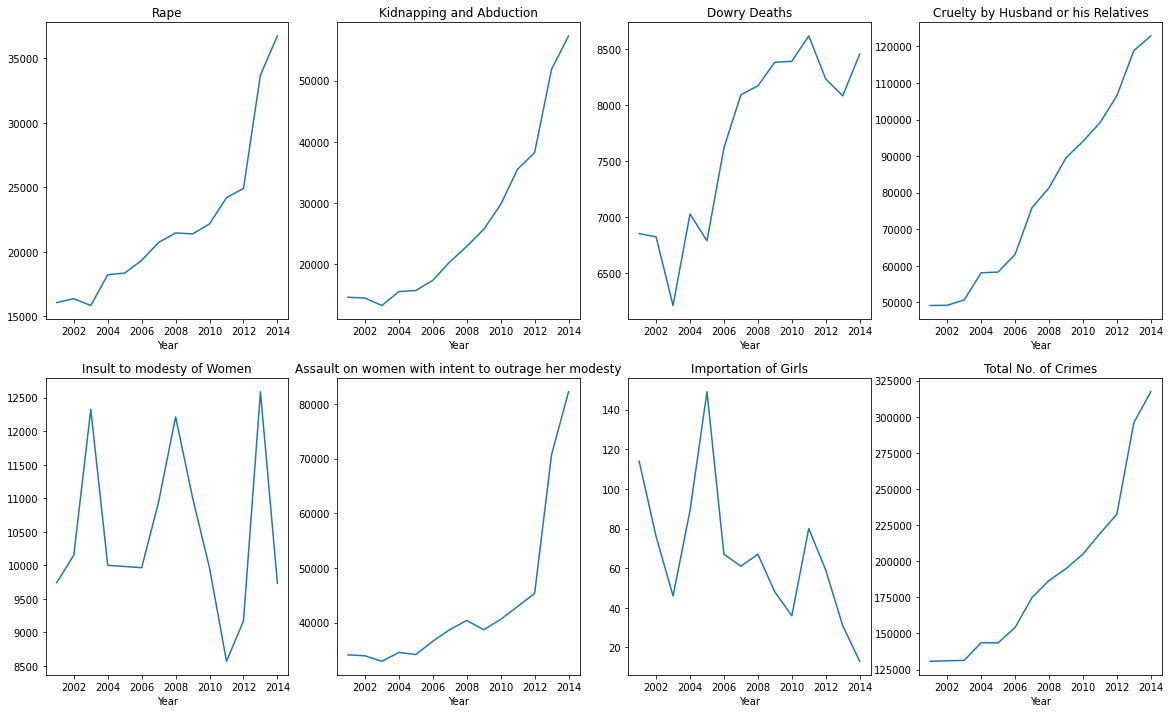

In [171]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
df.groupby("Year")["Rape"].sum().plot(title="Rape")
plt.subplot(2,4,2)
df.groupby("Year")["Kidnapping and Abduction"].sum().plot(title="Kidnapping and Abduction")
plt.subplot(2,4,3)
df.groupby("Year")["Dowry Deaths"].sum().plot(title="Dowry Deaths")
plt.subplot(2,4,6)
df.groupby("Year")["Assault on women with intent to outrage her modesty"].sum().plot(title="Assault on women with intent to outrage her modesty")
plt.subplot(2,4,5)
df.groupby("Year")["Insult to modesty of Women"].sum().plot(title="Insult to modesty of Women")
plt.subplot(2,4,4)
df.groupby("Year")["Cruelty by Husband or his Relatives"].sum().plot(title="Cruelty by Husband or his Relatives")
plt.subplot(2,4,7)
df.groupby("Year")["Importation of Girls"].sum().plot(title="Importation of Girls")
plt.subplot(2,4,8)
df.groupby("Year")["Total"].sum().plot(title="Total No. of Crimes")

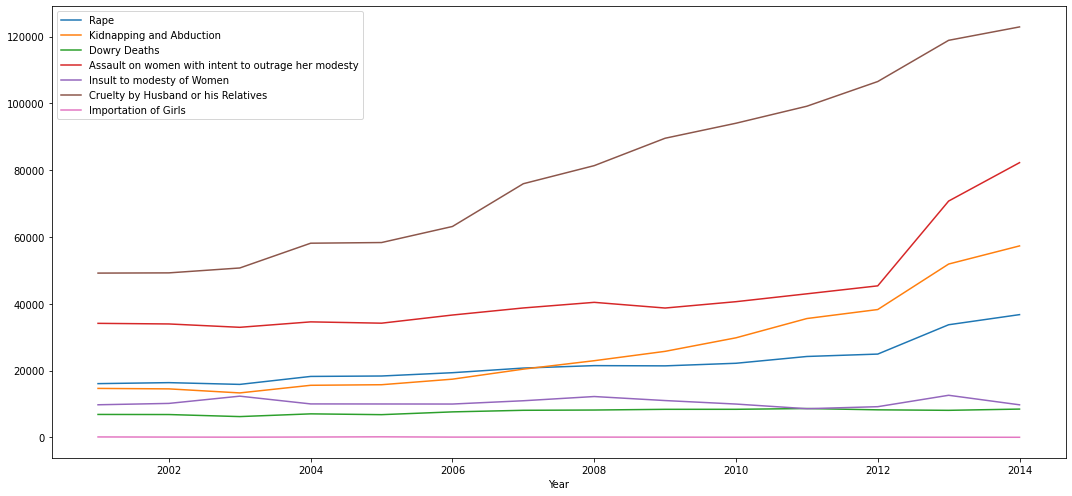

In [172]:
plt.figure(figsize=(15,7))
df.groupby("Year")["Rape"].sum().plot()
df.groupby("Year")["Kidnapping and Abduction"].sum().plot()
df.groupby("Year")["Dowry Deaths"].sum().plot(label="Dowry Deaths")
df.groupby("Year")["Assault on women with intent to outrage her modesty"].sum().plot()
df.groupby("Year")["Insult to modesty of Women"].sum().plot()
df.groupby("Year")["Cruelty by Husband or his Relatives"].sum().plot()
df.groupby("Year")["Importation of Girls"].sum().plot()
plt.legend()
plt.tight_layout()

### Categorical yearly crime rates

In [174]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df1=pd.DataFrame()
for i in crimes:
    df_c=df.groupby(['Year'])[i].sum()
    df1[i]=df_c
df1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,16075,14645,6851,34124,9746,49170,114
2002,16373,14506,6822,33943,10155,49237,76
2003,15847,13296,6208,32939,12325,50703,46
2004,18233,15578,7026,34567,10001,58121,89
2005,18359,15750,6787,34175,9984,58319,149
2006,19348,17414,7618,36617,9966,63128,67
2007,20737,20416,8093,38734,10950,75930,61
2008,21467,22939,8172,40413,12214,81344,67
2009,21397,25741,8383,38711,11009,89546,48


### Percentage Distribution of crime type

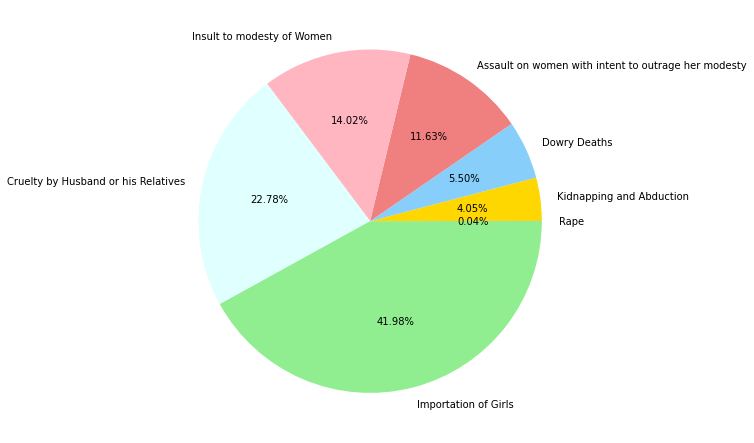

In [175]:
a=[]
for i in crimes:
  a.append(df1[i].sum())
a.sort()
plt.figure(figsize=(10,15))
plt.pie(a,labels=crimes,autopct='%1.2f%%',colors=['black', 'gold', 'lightskyblue', 'lightcoral','lightpink','lightcyan','lightgreen'])
plt.tight_layout()

In [177]:
df1.T

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Rape,16075,16373,15847,18233,18359,19348,20737,21467,21397,22172,24206,24923,33707,36735
Kidnapping and Abduction,14645,14506,13296,15578,15750,17414,20416,22939,25741,29795,35565,38262,51881,57311
Dowry Deaths,6851,6822,6208,7026,6787,7618,8093,8172,8383,8391,8618,8233,8083,8455
Assault on women with intent to outrage her modesty,34124,33943,32939,34567,34175,36617,38734,40413,38711,40613,42968,45351,70739,82235
Insult to modesty of Women,9746,10155,12325,10001,9984,9966,10950,12214,11009,9961,8570,9173,12589,9735
Cruelty by Husband or his Relatives,49170,49237,50703,58121,58319,63128,75930,81344,89546,94041,99135,106527,118866,122877
Importation of Girls,114,76,46,89,149,67,61,67,48,36,80,59,31,13


## State / UT wise Analysis of Crime

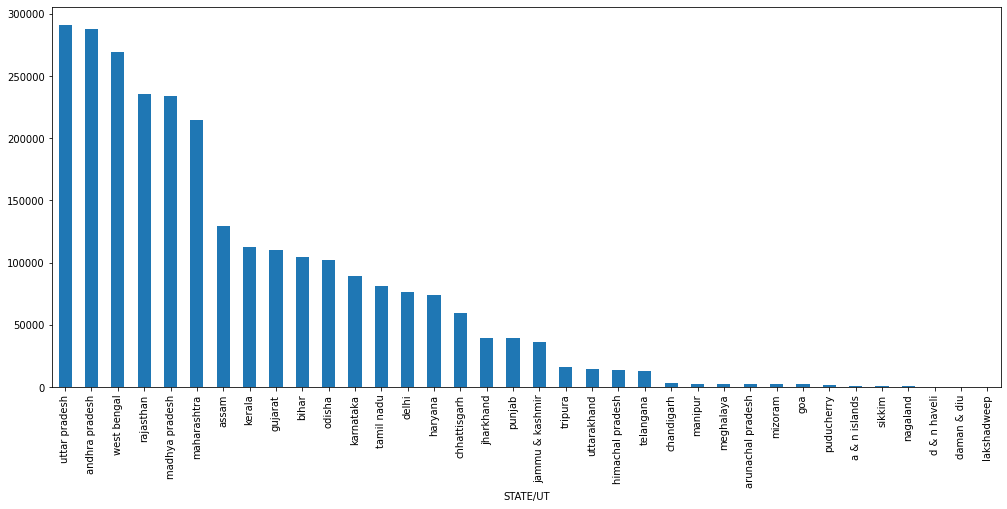

In [181]:
plt.figure(figsize=(17,7))
df.groupby("STATE/UT")["Total"].sum().sort_values(ascending=False).plot.bar()

In [182]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes
df_state["Total"]=df_state.sum(axis=1)
df_state=df_state.sort_values(by="Total",ascending=False)
df_state.reset_index()
df_state

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
uttar pradesh,25575,67953,28628,45606,26565,96869,3,291199
andhra pradesh,16075,17252,6922,63476,43482,140453,17,287677
west bengal,23938,30579,6154,33454,2674,172062,127,268988
rajasthan,22842,33139,5927,41681,397,131100,7,235093
madhya pradesh,45498,17804,10545,97739,10482,51408,67,233543
maharashtra,24487,15184,4848,57352,16317,96601,3,214792
assam,20095,31037,1634,19128,127,57650,11,129682
kerala,10015,2226,350,40219,3965,55813,0,112588
gujarat,5822,17335,554,11593,1615,73234,0,110153


### Top 3 States with Higher Number of Crimes

In [183]:
df_state.head(3)

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
uttar pradesh,25575,67953,28628,45606,26565,96869,3,291199
andhra pradesh,16075,17252,6922,63476,43482,140453,17,287677
west bengal,23938,30579,6154,33454,2674,172062,127,268988


### 3 States with lower Number of Crimes

In [184]:
df_state.tail(3)

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
d & n haveli,66,112,1,53,6,45,0,283
daman & diu,30,22,3,20,2,38,0,115
lakshadweep,10,1,0,7,2,7,0,27


### Top 5 States having higher Rape Cases

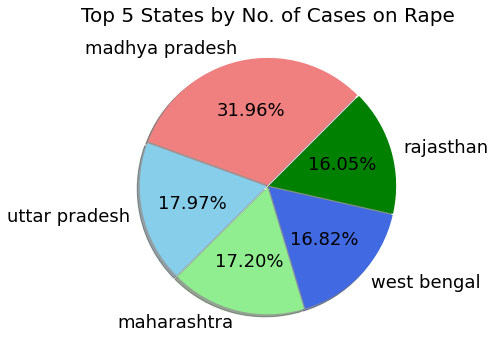

In [185]:
top_rape_by_state=df_state.sort_values(by="Rape",ascending=False)
top_3rape=top_rape_by_state.iloc[:,0:1].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3rape.Rape,labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title("Top 5 States by No. of Cases on Rape",fontdict={'fontsize' : 20})
plt.tight_layout()

### Top 5 States having higher Kidnapping and Abduction


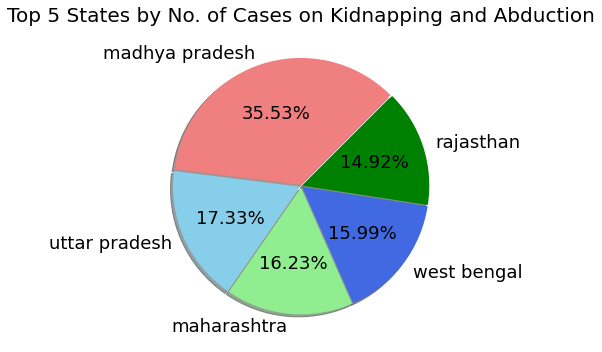

In [186]:
top_kidabd_by_state=df_state.sort_values(by="Kidnapping and Abduction",ascending=False)
top_3kidabd=top_kidabd_by_state.iloc[:,1:2].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3kidabd["Kidnapping and Abduction"],labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title("Top 5 States by No. of Cases on Kidnapping and Abduction",fontdict={'fontsize' : 20})
plt.tight_layout()

### **Top 5 States having higher Dowry Death's**

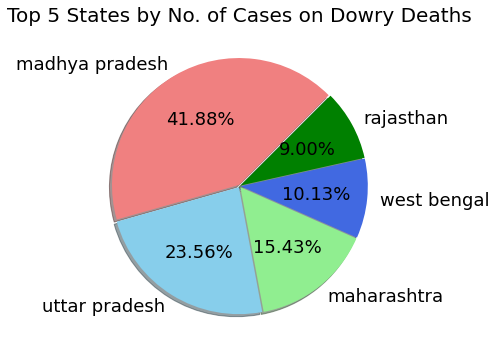

In [187]:
top_dow_by_state=df_state.sort_values(by="Dowry Deaths",ascending=False)
top_3dow=top_dow_by_state.iloc[:,2:3].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3dow["Dowry Deaths"],labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title("Top 5 States by No. of Cases on Dowry Deaths",fontdict={'fontsize' : 20})
plt.tight_layout()

### **Top 5 States having higher Assault on women with intent to outrage her modesty**

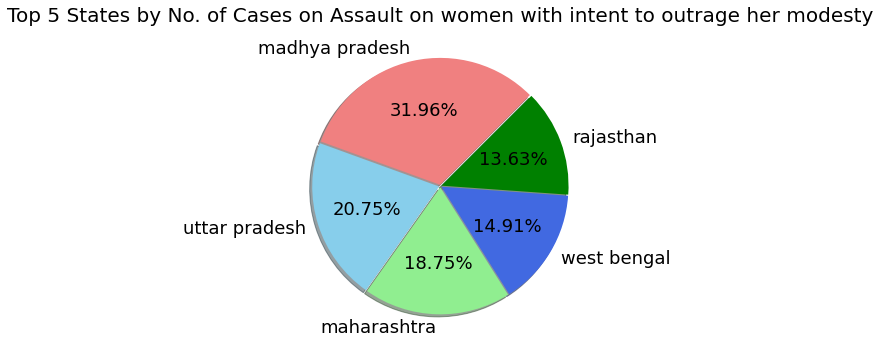

In [188]:
top_ass_by_state=df_state.sort_values(by="Assault on women with intent to outrage her modesty",ascending=False)
top_3ass=top_ass_by_state.iloc[:,3:4].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3ass["Assault on women with intent to outrage her modesty"],labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title("Top 5 States by No. of Cases on Assault on women with intent to outrage her modesty",fontdict={'fontsize' : 20})
plt.tight_layout()

###**Top 5 States having higher Assault on women with intent to outrage her modesty**

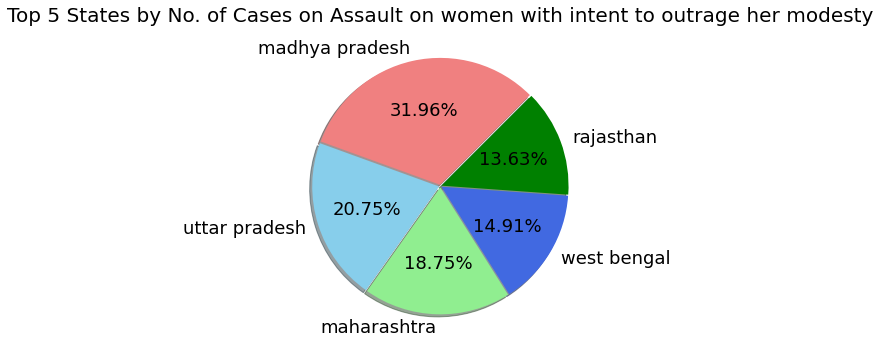

In [189]:
top_ass_by_state=df_state.sort_values(by="Assault on women with intent to outrage her modesty",ascending=False)
top_3ass=top_ass_by_state.iloc[:,3:4].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3ass["Assault on women with intent to outrage her modesty"],labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title("Top 5 States by No. of Cases on Assault on women with intent to outrage her modesty",fontdict={'fontsize' : 20})
plt.tight_layout()

### **Top 5 States having higher Insult to modesty of Women**

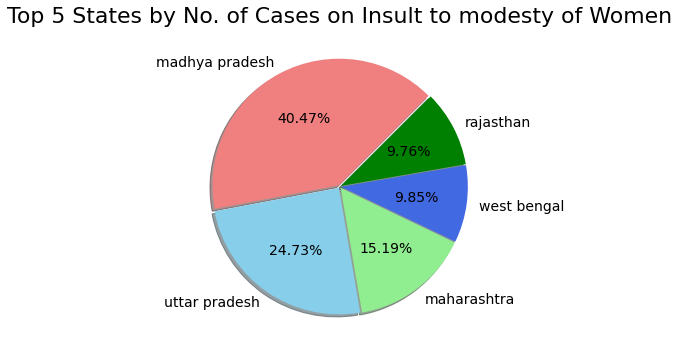

In [190]:
top_mod_by_state=df_state.sort_values(by="Insult to modesty of Women",ascending=False)
top_3mod=top_mod_by_state.iloc[:,4:5].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3mod["Insult to modesty of Women"],labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 14},shadow=True,explode=[0.012,0.012,0.012,0.012,0.012])
plt.title("Top 5 States by No. of Cases on Insult to modesty of Women",fontdict={'fontsize' : 22})
plt.tight_layout()

###**Top 5 States having higher cases on Cruelty by Husband or his Relatives**

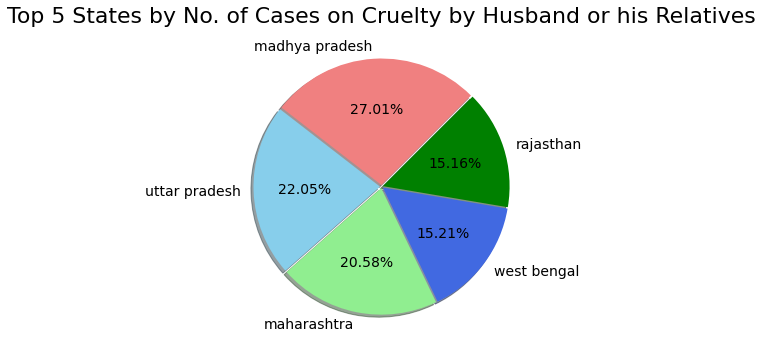

In [191]:
top_cr_by_state=df_state.sort_values(by="Cruelty by Husband or his Relatives",ascending=False)
top_3cr=top_cr_by_state.iloc[:,5:6].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3cr["Cruelty by Husband or his Relatives"],labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 14},shadow=True,explode=[0.012,0.012,0.012,0.012,0.012])
plt.title("Top 5 States by No. of Cases on Cruelty by Husband or his Relatives",fontdict={'fontsize' : 22})
plt.tight_layout()

###**Top 5 States having higher cases on Importation of Girls**

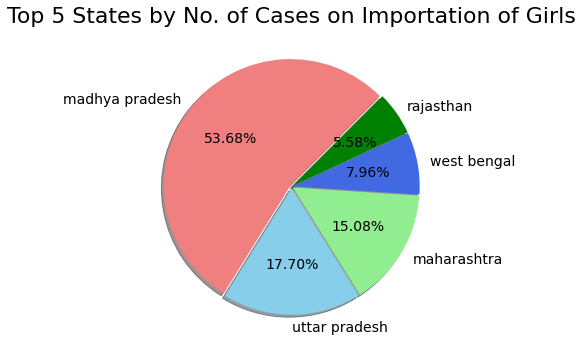

In [192]:
top_imp_by_state=df_state.sort_values(by="Importation of Girls",ascending=False)
top_3imp=top_imp_by_state.iloc[:,6:7].head(5)
plt.figure(figsize=(10,5))
plt.pie(top_3imp["Importation of Girls"],labels=top_3rape.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 14},shadow=True,explode=[0.012,0.012,0.012,0.012,0.012])
plt.title("Top 5 States by No. of Cases on Importation of Girls",fontdict={'fontsize' : 22})
plt.tight_layout()

## Analysis of Top 5 States

### **1. Uttar Pradesh**

In [193]:
df_up=df_state.loc[df_state.index=="uttar pradesh"]
dfupT=df_up.T.drop("Total")
dfupT

STATE/UT,uttar pradesh
Rape,25575
Kidnapping and Abduction,67953
Dowry Deaths,28628
Assault on women with intent to outrage her modesty,45606
Insult to modesty of Women,26565
Cruelty by Husband or his Relatives,96869
Importation of Girls,3


#### **Percentage Distribution of Crimes in Uttar Pradesh from 2001 to 2014**

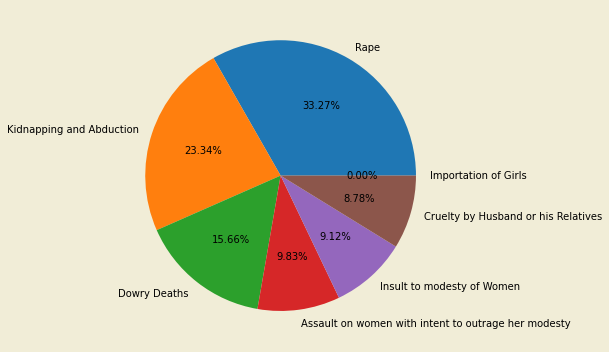

In [194]:
plt.figure(figsize=(12,5)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfupT["uttar pradesh"].sort_values(ascending=False),labels=dfupT.index,autopct='%1.2f%%')
plt.tight_layout()

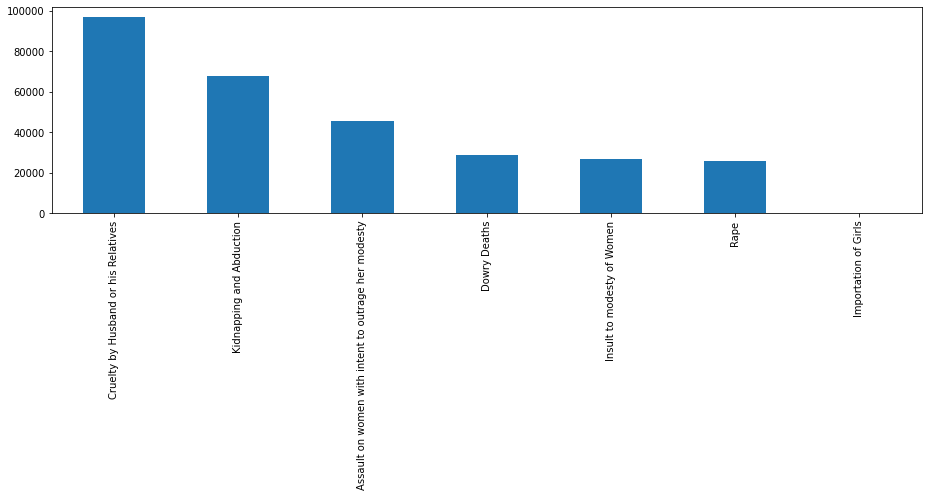

In [195]:
plt.figure(figsize=(13,7))
dfupT.groupby(dfupT.index)["uttar pradesh"].sum().sort_values(ascending=False).plot.bar()
plt.tight_layout()

#### **Year Wise Distribution of Crimes in Uttar Pradesh**

In [196]:
crime_up=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls',"Total"]

df_up_year=df.loc[df['STATE/UT']=='uttar pradesh']

df1_up_yearwise=pd.DataFrame()
for i in crime_up:
    df_crimes_up=df_up_year.groupby(['Year'])[i].sum()
    df1_up_yearwise[i]=df_crimes_up
df1_up_yearwise

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2001,1958,2879,2211,2870,2575,7365,0,19858
2002,1415,2298,1893,2145,1887,5679,0,15317
2003,911,1499,1322,1098,4970,2626,0,12426
2004,1397,2324,1708,1900,2682,4950,3,14964
2005,1217,2256,1564,1835,2881,4505,0,14258
2006,1314,2551,1798,2096,2714,5204,0,15677
2007,1648,3363,2076,2522,2882,7650,0,20141
2008,1871,4439,2237,2955,3374,8312,0,23188
2009,1759,5078,2232,2782,2524,8566,0,22941


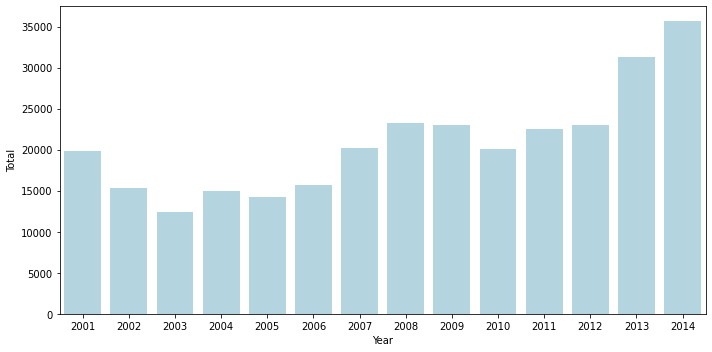

In [197]:
plt.figure(figsize=(10,5))
sns.barplot(data=df1_up_yearwise,x=df1_up_yearwise.index,y='Total',color="lightblue")
plt.tight_layout()

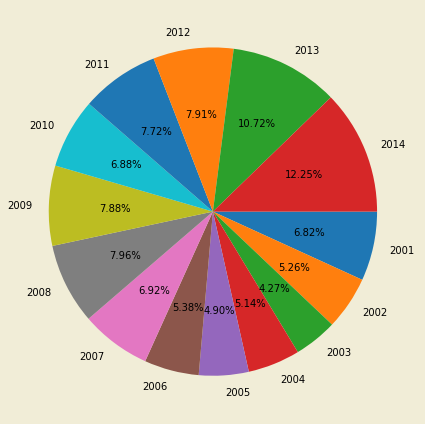

In [198]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(df1_up_yearwise["Total"],labels=df1_up_yearwise.index,autopct='%1.2f%%',counterclock=False)
plt.tight_layout()

#### **Timeline Analysis of Different Categories of Crime at Different Period of Time**

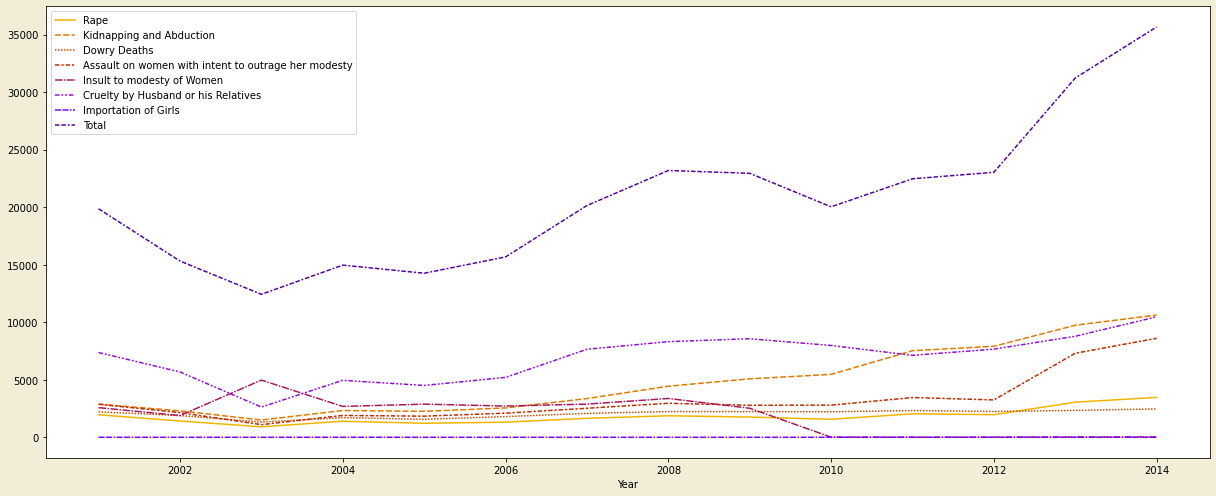

In [199]:
plt.figure(figsize=(17,7)).patch.set_facecolor("#F1EDD7FF")
sns.lineplot(data=df1_up_yearwise,palette='gnuplot_r',linestyle="dashed")
plt.tight_layout()

### **2. Madhya Pradesh**

In [223]:
df_ap=df_state.loc[df_state.index=="madhya pradesh"]
dfapT=df_ap.T.drop("Total")
dfapT

STATE/UT,madhya pradesh
Rape,45498
Kidnapping and Abduction,17804
Dowry Deaths,10545
Assault on women with intent to outrage her modesty,97739
Insult to modesty of Women,10482
Cruelty by Husband or his Relatives,51408
Importation of Girls,67


#### **Percentage Distribution of Crimes in from 2001 to 2014**

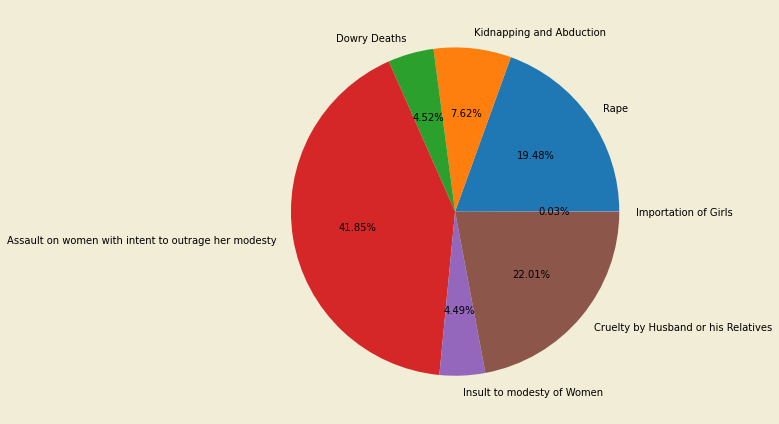

In [224]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfapT["madhya pradesh"],labels=dfapT.index,autopct="%1.2f%%")
plt.tight_layout()

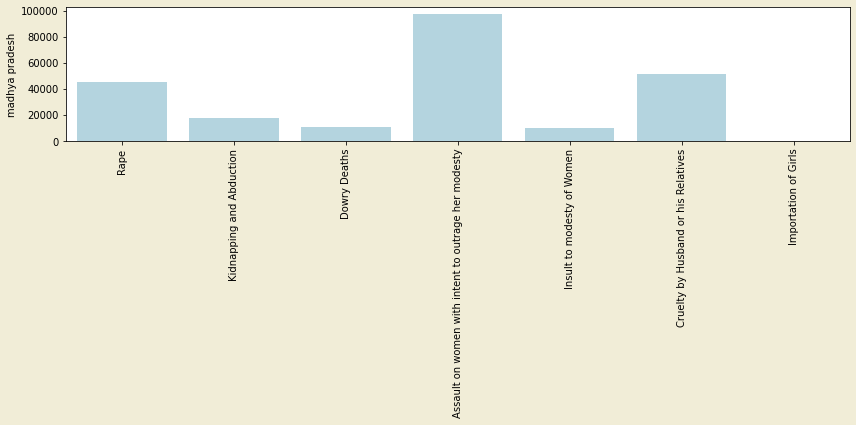

In [225]:
plt.figure(figsize=(12,6)).patch.set_facecolor("#F1EDD7FF")
sns.barplot(data=dfapT,x=dfapT.index,y=dfapT["madhya pradesh"],color="lightblue")
plt.xticks(rotation=90)
plt.tight_layout()

#### **Year Wise Distribution of Crimes**

In [226]:
crime_ap=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls',"Total"]

df_ap_year=df.loc[df['STATE/UT']=='madhya pradesh']

df1_ap_yearwise=pd.DataFrame()
for i in crime_ap:
    df_crimes_ap=df_ap_year.groupby(['Year'])[i].sum()
    df1_ap_yearwise[i]=df_crimes_ap
df1_ap_yearwise

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2001,2851,668,609,7063,751,2562,0,14504
2002,2891,639,674,7118,783,3117,0,15222
2003,2738,608,648,6848,705,2938,0,14485
2004,2875,584,751,6690,804,3436,0,15140
2005,2921,604,739,6426,792,2989,3,14474
2006,2900,617,764,6243,762,2989,0,14275
2007,3010,701,742,6772,780,3294,0,15299
2008,2937,736,805,6445,758,3185,0,14866
2009,2998,841,858,6307,728,3983,1,15716


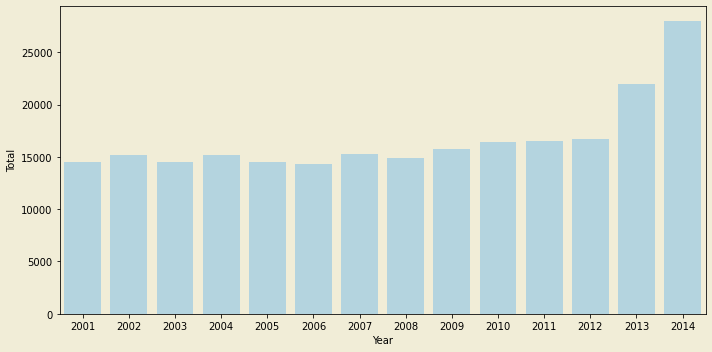

In [227]:
plt.figure(figsize=(10,5)).patch.set_facecolor("#F1EDD7FF")
plt.axes().set_facecolor("#F1EDD7FF")
sns.barplot(data=df1_ap_yearwise,x=df1_ap_yearwise.index,y='Total',color="lightblue")
plt.tight_layout()

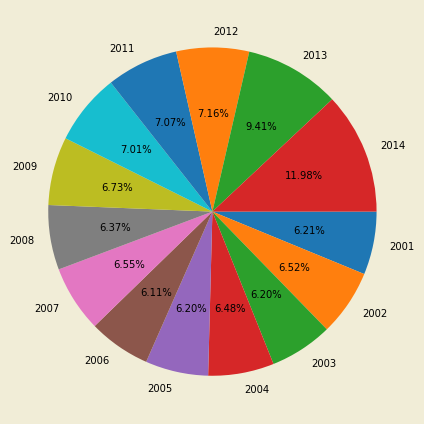

In [228]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(df1_ap_yearwise["Total"],labels=df1_ap_yearwise.index,autopct='%1.2f%%',counterclock=False)
plt.tight_layout()

#### **Timeline Analysis of Different Categories of Crime at Different Period of Time**

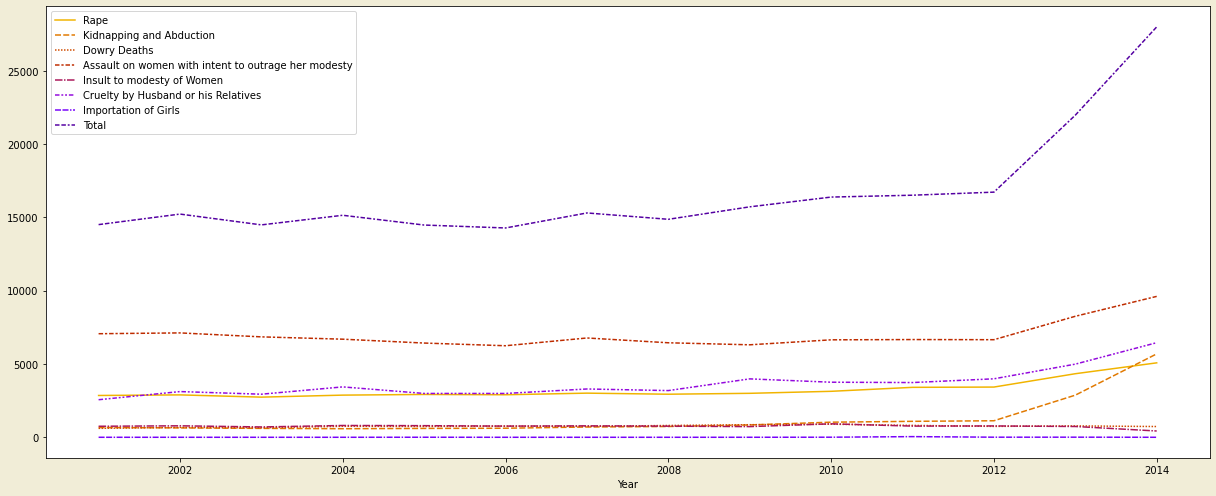

In [229]:
plt.figure(figsize=(17,7)).patch.set_facecolor("#F1EDD7FF")
sns.lineplot(data=df1_ap_yearwise,palette='gnuplot_r',linestyle="dashed")
plt.tight_layout()

### **3. West Bengal**

In [207]:
df_wb=df_state.loc[df_state.index=="west bengal"]
dfwbT=df_wb.T.drop("Total")
dfwbT

STATE/UT,west bengal
Rape,23938
Kidnapping and Abduction,30579
Dowry Deaths,6154
Assault on women with intent to outrage her modesty,33454
Insult to modesty of Women,2674
Cruelty by Husband or his Relatives,172062
Importation of Girls,127


#### **Percentage Distribution of Crimes in from 2001 to 2014**

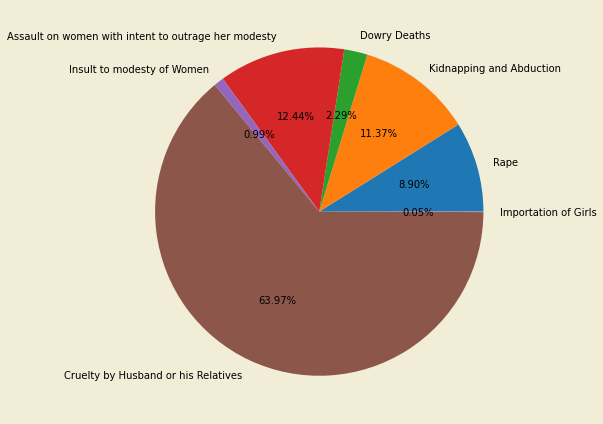

In [208]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfwbT["west bengal"],labels=dfwbT.index,autopct="%1.2f%%")
plt.tight_layout()

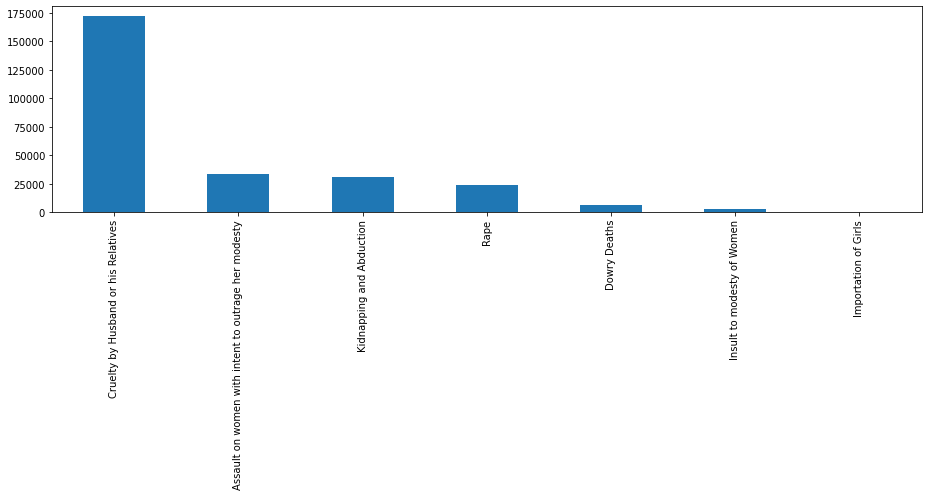

In [209]:
plt.figure(figsize=(13,7))
dfwbT.groupby(dfwbT.index)["west bengal"].sum().sort_values(ascending=False).plot.bar()
plt.tight_layout()

#### **Year Wise Distribution of Crimes**

In [210]:
crime_wb=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls',"Total"]

df_wb_year=df.loc[df['STATE/UT']=='west bengal']

df1_wb_yearwise=pd.DataFrame()
for i in crime_wb:
    df_crimes_wb=df_wb_year.groupby(['Year'])[i].sum()
    df1_wb_yearwise[i]=df_crimes_wb
df1_wb_yearwise

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2001,709,695,265,954,48,3859,3,6533
2002,759,694,273,964,34,4069,1,6794
2003,1002,801,329,1186,71,4948,1,8338
2004,1475,1018,396,1566,64,6334,12,10865
2005,1686,1039,446,1572,54,6936,61,11794
2006,1731,1199,445,1837,63,7414,1,12690
2007,2106,1590,451,2281,99,9900,5,16432
2008,2263,1907,451,2396,94,13663,5,20779
2009,2336,2187,506,1942,108,16112,5,23196


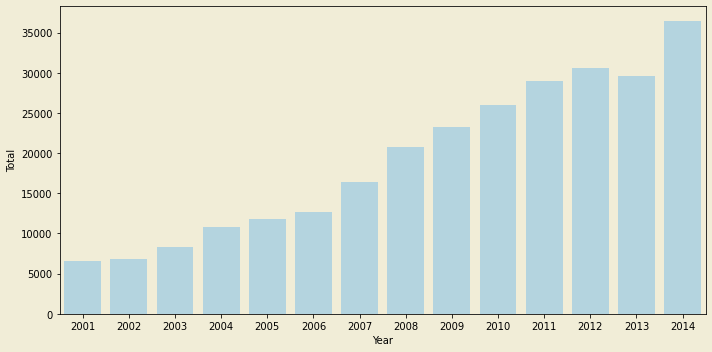

In [211]:
plt.figure(figsize=(10,5)).patch.set_facecolor("#F1EDD7FF")
plt.axes().set_facecolor("#F1EDD7FF")
sns.barplot(data=df1_wb_yearwise,x=df1_wb_yearwise.index,y='Total',color="lightblue")
plt.tight_layout()

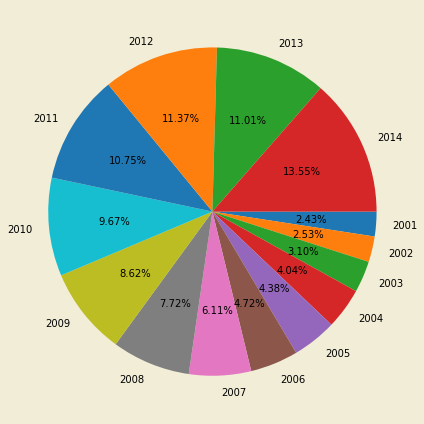

In [212]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(df1_wb_yearwise["Total"],labels=df1_wb_yearwise.index,autopct='%1.2f%%',counterclock=False)
plt.tight_layout()

#### **Timeline Analysis of Different Categories of Crime at Different Period of Time**

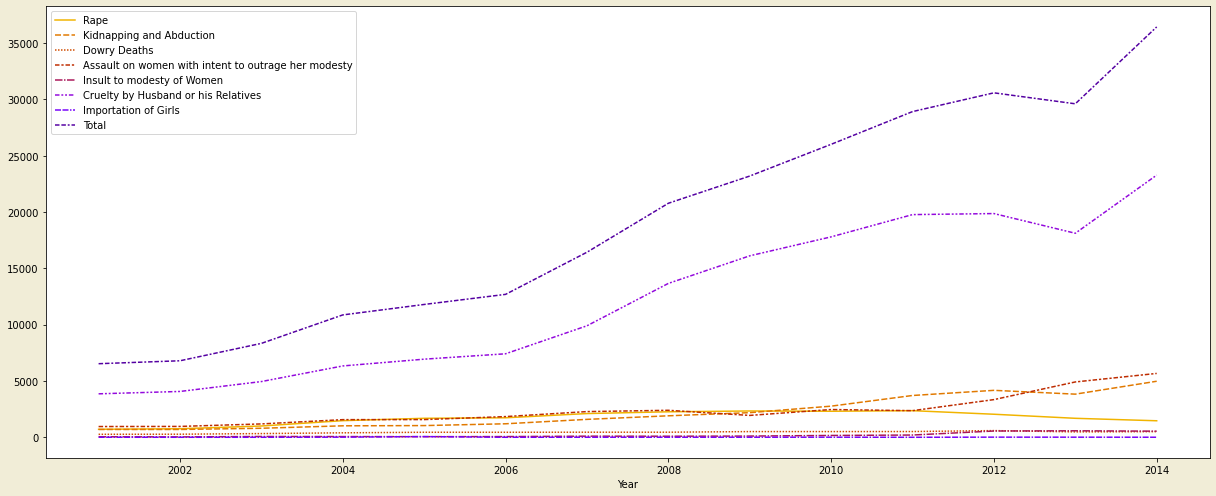

In [213]:
plt.figure(figsize=(17,7)).patch.set_facecolor("#F1EDD7FF")
sns.lineplot(data=df1_wb_yearwise,palette='gnuplot_r',linestyle="dashed")
plt.tight_layout()



```
# This is formatted as code
```

### **2. Maharashtra**

In [215]:
df_mh=df_state.loc[df_state.index=="maharashtra"]
dfmhT=df_mh.T.drop("Total")
dfmhT

STATE/UT,maharashtra
Rape,24487
Kidnapping and Abduction,15184
Dowry Deaths,4848
Assault on women with intent to outrage her modesty,57352
Insult to modesty of Women,16317
Cruelty by Husband or his Relatives,96601
Importation of Girls,3


#### **Percentage Distribution of Crimes in from 2001 to 2014**

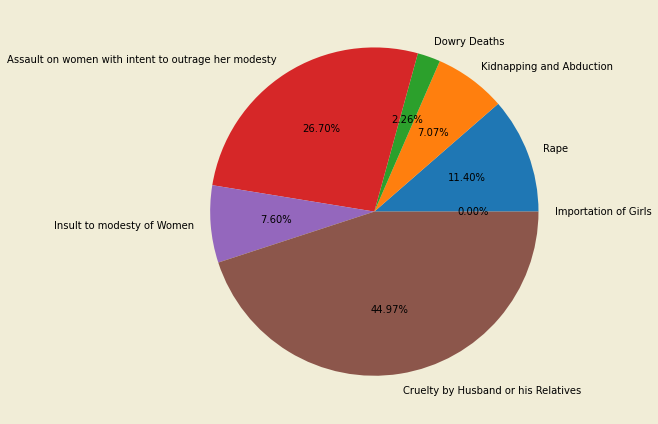

In [217]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfmhT["maharashtra"],labels=dfmhT.index,autopct="%1.2f%%")
plt.tight_layout()

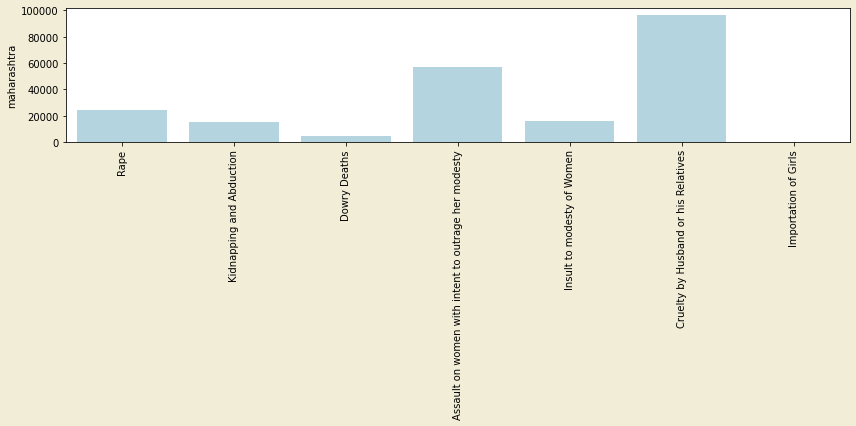

In [218]:
plt.figure(figsize=(12,6)).patch.set_facecolor("#F1EDD7FF")
sns.barplot(data=dfapT,x=dfmhT.index,y=dfmhT["maharashtra"],color="lightblue")
plt.xticks(rotation=90)
plt.tight_layout()

#### **Year Wise Distribution of Crimes**

In [219]:
crime_mh=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls',"Total"]

df_mh_year=df.loc[df['STATE/UT']=='maharashtra']

df1_mh_yearwise=pd.DataFrame()
for i in crime_mh:
    df_crimes_mh=df_mh_year.groupby(['Year'])[i].sum()
    df1_mh_yearwise[i]=df_crimes_mh
df1_mh_yearwise

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2001,1302,611,308,2823,1120,6090,1,12255
2002,1352,650,303,2686,769,5353,0,11113
2003,1268,626,368,2661,682,5452,0,11057
2004,1388,787,314,2831,862,5646,0,11828
2005,1545,851,341,3228,919,6233,0,13117
2006,1500,921,387,3479,984,6738,1,14010
2007,1451,967,436,3306,1039,7356,0,14555
2008,1558,998,390,3619,1091,7829,0,15485
2009,1483,926,341,3196,1099,7681,0,14726


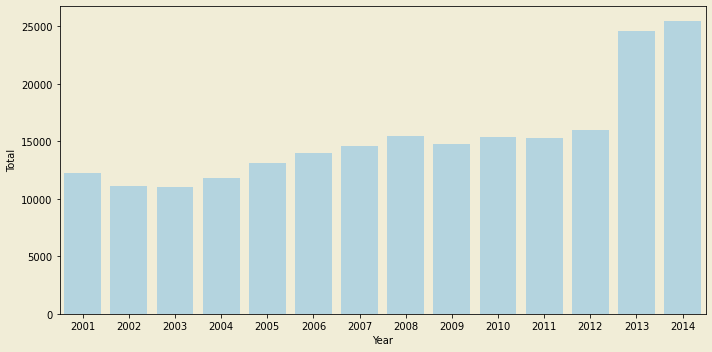

In [220]:
plt.figure(figsize=(10,5)).patch.set_facecolor("#F1EDD7FF")
plt.axes().set_facecolor("#F1EDD7FF")
sns.barplot(data=df1_mh_yearwise,x=df1_mh_yearwise.index,y='Total',color="lightblue")
plt.tight_layout()

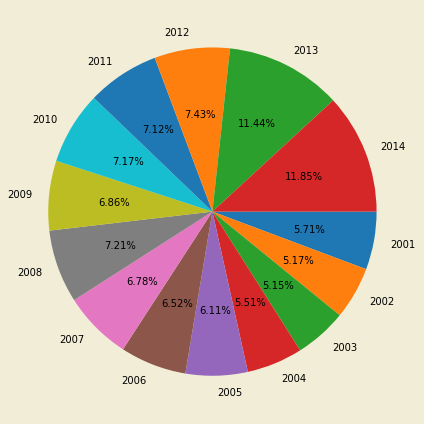

In [221]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(df1_mh_yearwise["Total"],labels=df1_mh_yearwise.index,autopct='%1.2f%%',counterclock=False)
plt.tight_layout()

#### **Timeline Analysis of Different Categories of Crime at Different Period of Time**

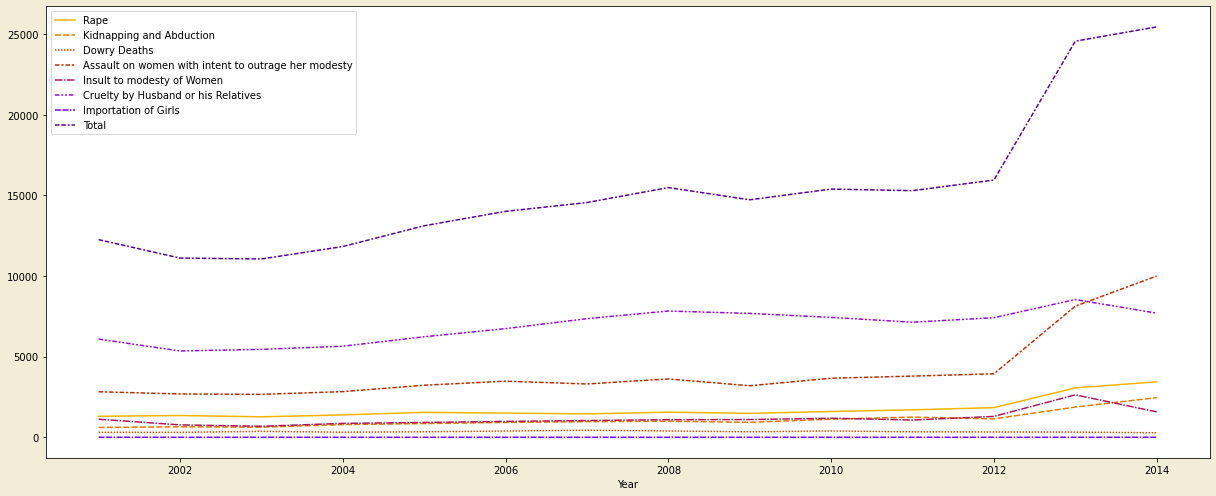

In [222]:
plt.figure(figsize=(17,7)).patch.set_facecolor("#F1EDD7FF")
sns.lineplot(data=df1_mh_yearwise,palette='gnuplot_r',linestyle="dashed")
plt.tight_layout()